<div align='center'><font size='20'> 视频编解码简介 </font></div>

## 多媒体处理流程
#### 引用

https://github.com/leandromoreira/digital_video_introduction/blob/master/README-cn.md

https://blog.csdn.net/leixiaohua1020


#### 视频编解码技术背景：
* 主要用于压缩视频传输码率或存储空间：

In [5]:
print(1080*762*3*8*30/1024.0/1024.0,"Mb")

565.081787109375 Mb


* 解码时用插帧，使播放更为流畅


![workflow](workflow.jfif "https://blog.csdn.net/leixiaohua1020/article/details/15811977")

* 解协议：网络数据协议解析，常见协议HTTP，RTMP，MMS
* 解封装：封装格式解析，常见封装格式MKV，RMVB，TS，FLV，AVI，MP4
* 解码：视音频解码，常见音频解码标准AAC，MP3，AC-3，常见视频解码标准：H.264，MPEG2，VC-1
* 视音频同步：解码后的数据由声卡显卡播放

## FLV格式解析

#### FLV文件格式
![flvformat](flv_format)
#### FLV格式解析
![flvdetail](flv_detail)
#### FLV audio fromat
![flvautiotag](audio_tag)
#### FLV video format
![flvvideotag](video_tag)

In [11]:
f = open('barsandtone.flv', 'rb+')
flvSig = f.read(3)
print('Signature:0x%x,0x%x,0x%x' % (flvSig[0], flvSig[1], flvSig[2]), flvSig)
flvVersion = f.read(1)
print('Version:', flvVersion.hex())
flvFlags = f.read(1)
print('Flags:', bin(int(flvFlags.hex())))
headerSize = f.read(4)
print('Header size:',headerSize.hex())
f.read(0xe0+0xb+4) #offset to audio tag
#f.read(0x13b+0xb+4) #offset to audio tag
#f.read(0x13b+0xb+4) #offset to video tag
PTS = f.read(4)
print('Pre TAG length:', PTS.hex())

THType = f.read(1)
print('TAG header type:', THType.hex())
THDatasize = f.read(3)
print('TAG header datasize', THDatasize.hex())
THTimestamp = f.read(3)
print('TAG header timestamp', THTimestamp.hex())
THTimestampExt = f.read(1)
print('TAG header timestamp extion', THTimestampExt.hex())
THStreamID = f.read(3)
print('TAG stream id, always zero', THStreamID)
TD = f.read(int(THDatasize.hex(), 16))
print('TAG Data:', TD)
print('>>>>>>>>>>>', hex(TD[0]))
NPTS = f.read(4)
print('Pre TAG length:', NPTS.hex())
NTHType = f.read(1)
print('Next TAG header type:', NTHType.hex())
f.close()
fw = open('h264.f', 'wb+')
fw.write(TD)
fw.close()


Signature:0x46,0x4c,0x56 b'FLV'
Version: 01
Flags: 0b101
Header size: 00000009
Pre TAG length: 000000eb
TAG header type: 08
TAG header datasize 00013b
TAG header timestamp 000000
TAG header timestamp extion 00
TAG stream id, always zero b'\x00\x00\x00'
TAG Data: b'/\xff\xfbrP\x00\x00\x00\x00\x00K\x05\x00\x00\x00\x07\xe0\tm\xa0\x00\x00\n\x997[9F\x80X\xc2\x8f+w(\xd0\x08\xff\xff\xff\xff\xff\xff\xff\xfe\x10\x00\x00\x00 \x82\x10a\x01\xe0c\xc2\x86\xae\xf1p\x01\xa3+\xe0\xdb`\n!\xe07\xc8\x7f\xa0&c\x9f\xfce\x8eCE\xff\xe3\xd0z\x1a\x17\xd3\xff\xf8\xf7\x1e\xe6\xe4\xa1\xa7\xff\xf1\xe8=\n\x03\x9c\xbe\xff\xff\xf8\xc3\x8c8\xf3\x13\x02Q\x89A\xe8P\xff\xff\xfc\xben\xe9\xa6\x99p@\x07\xf3\xf1\xf8\xfc~?_\xa0\x18\x0c\x06\x03\x01\xf8\x18\xf0\xa1\xab\xbc\\\x00h\xca\xf86\xd8\x02\x88x\r\xf2\x1f\xe8\t\x98\xe7\xff\x19c\x90\xd1\x7f\xf8\xf4\x1e\x86\x85\xf4\xc0\x1c\x00\x00\x00\x00xP\x00\x00\x00\x00\x0c\x0b\xc1\x98\xc1\xcc\x1e\x9fWS\x16\x9ea\x0e\x14F\n\xc3_\r\x183\x05_\x0c\x0eE\x08\xcft*\x8c\x19\x82\xd4\xd3\x08i\x07\x

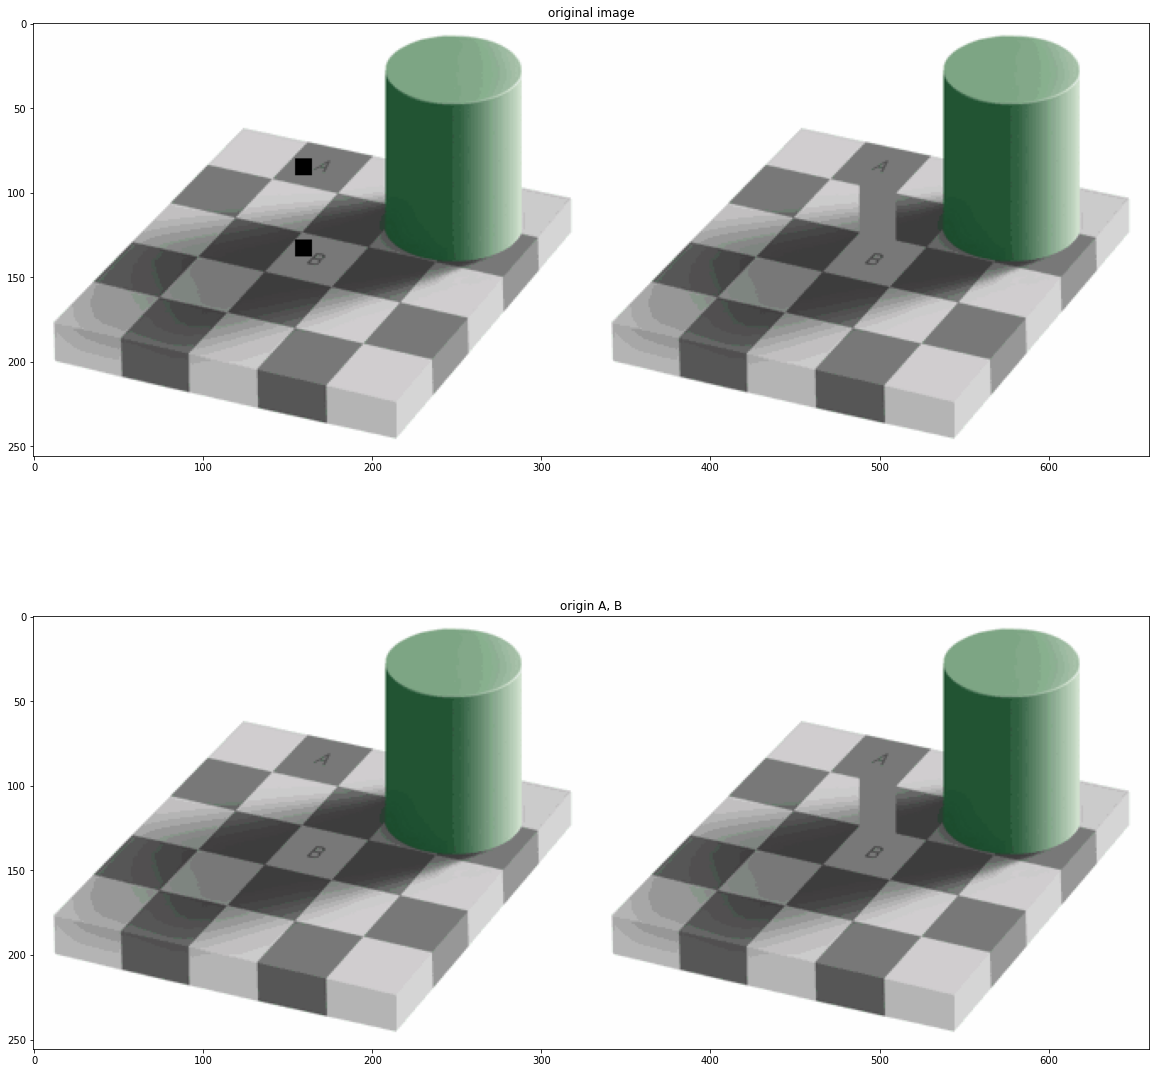

location A pixel value: [[[120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]]

 [[120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]]

 [[120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]]

 [[120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]]

 [[120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]]

 [[120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]
  [120 120 120]]

 [[1

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
img = cv2.imread('luminance_vs_color.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = copy.deepcopy(img)
localA = (80, 155)
localB = (128, 155)

img[localA[0]:localA[0]+10, localA[1]:localA[1]+10,:] = 0
img[localB[0]:localB[0]+10, localB[1]:localB[1]+10,:] = 0
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(20, 20, forward=True)

axs[0].set_title('original image')
axs[0].imshow(img)
axs[1].set_title('origin A, B')
axs[1].imshow(img2)
plt.show()
print('location A pixel value:', img2[localA[0]:localA[0]+10, localA[1]:localA[1]+10,:])
print('location B pixel value:', img2[localB[0]:localB[0]+10, localB[1]:localB[1]+10,:])

## 人眼睛的工作特点
#### 相比颜色对亮度更敏感

![lumvscolor](luminance_vs_color.png)

简单来说，让我们把颜色和亮度放在眼睛的功能部位上。视杆细胞主要负责亮度，而视锥细胞负责颜色，有三种类型的视锥，每个都有不同的颜料，叫做：S-视锥（蓝色），M-视锥（绿色）和L-视锥（红色）。
![eyes](eyes.jpg)
#### 颜色的Ycbcr表示
将亮度（光亮）和色度（颜色）分离开,Y 来表示亮度，还有两种颜色通道：Cb（蓝色色度） 和 Cr（红色色度)
![ycbcr](ycbcr.png)
#### YCbCr 和 RGB 之间的转换
BT.601 中的系数

Y = 0.299R + 0.587G + 0.114B
 
Cb = 0.564(B - Y)
 
Cr = 0.713(R - Y)
 
R = Y + 1.402Cr
 
B = Y + 1.772Cb
 
G = Y - 0.344Cb - 0.714Cr

现代编解码器中使用的常用方案是： 4:4:4 (没有子采样), 4:2:2, 4:1:1, 4:2:0, 4:1:0 and 3:1:1
![yuv_420](ycbcr_420_merge.png)

#### RGB to YUV420 实现

```c++
for (int i = 0; i < height; i++)
	{
		for (int j = 0; j < width; j++)
		{
			B = rgb[(i * width + j) * 3 + 0];
			G = rgb[(i * width + j) * 3 + 1];
			R = rgb[(i * width + j) * 3 + 2];
			
			//RGB to YUV
			Y = ((66 * R + 129 * G + 25 * B + 128) >> 8) + 16;
			U = ((-38 * R - 74 * G + 112 * B + 128) >> 8) + 128;
			V = ((112 * R - 94 * G - 18 * B + 128) >> 8) + 128;
 
			yuv420sp[yIndex++] = (unsigned char)((Y < 0) ? 0 : ((Y > 255) ? 255 : Y));
			if (i % 2 == 0 && j % 2 == 0)
			{
				yuv420sp[uvIndex++] = (unsigned char)((V < 0) ? 0 : ((V > 255) ? 255 : V));
				yuv420sp[uvIndex++] = (unsigned char)((U < 0) ? 0 : ((U > 255) ? 255 : U));
			}
		}
	}
————————————————
版权声明：本文为CSDN博主「ChuanjieZhu」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/u014485485/article/details/89709798
```
#### 不同色度效果展示
最后一行图像展示了色度的分辨率
![yuv_emrge](chroma_subsampling_examples.jpg)

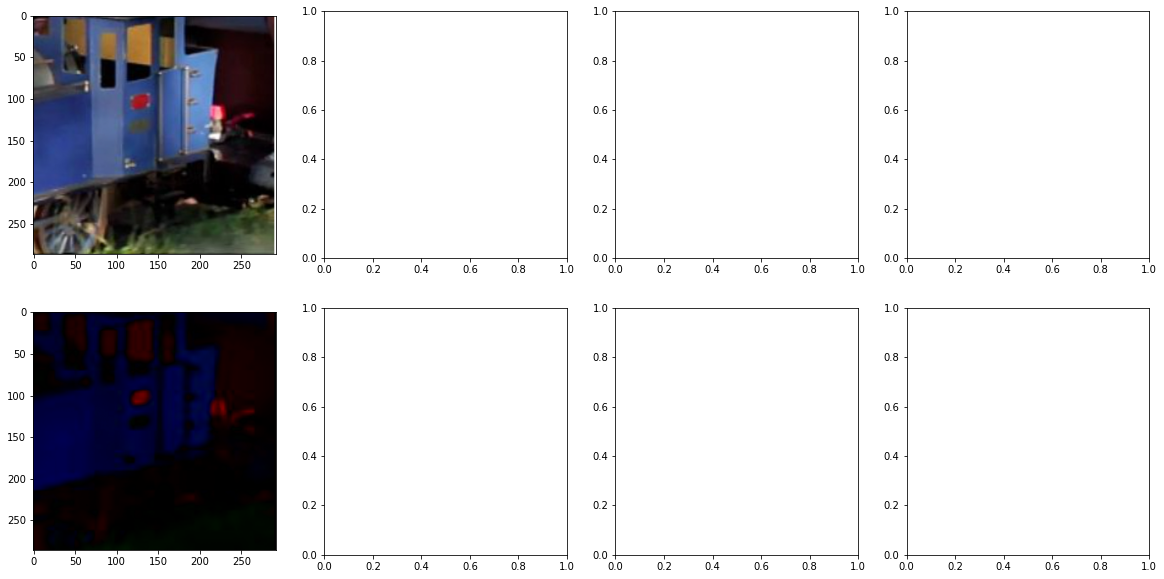

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('yuv444.png')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(20, 10, forward=True)
axs[0,0].imshow(cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB))
img_yuv[:,:,0] = 0
axs[1,0].imshow(cv2.cvtColor(img_yuv, cv2.cv2.COLOR_YUV2RGB))
plt.show()

## 帧内压缩
#### DCT离散余弦变换
DCT帧内压缩原理：
1. 对图片进行傅里叶变换的意义
    - 将图片空间域转换为频域，不同位置像素值的上下波动为不同频率
2. DCT与DFT的区别
    - DCT可将能量高（上下波动明显）的频率信号集中在一起，方便量化（裁剪）
3. 量化而不影响观看的原因
    - DCT后的能量将低能量裁剪并不影响观看，是因为人眼对波动低（对比度低）的地方感受不强烈
4. 熵编码
    - 熵编码是因编码后的平均码长接近信源熵值而得名，熵编码多用可变字长编码（VLC，Variable Length Coding）实现（哈夫曼编码）

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


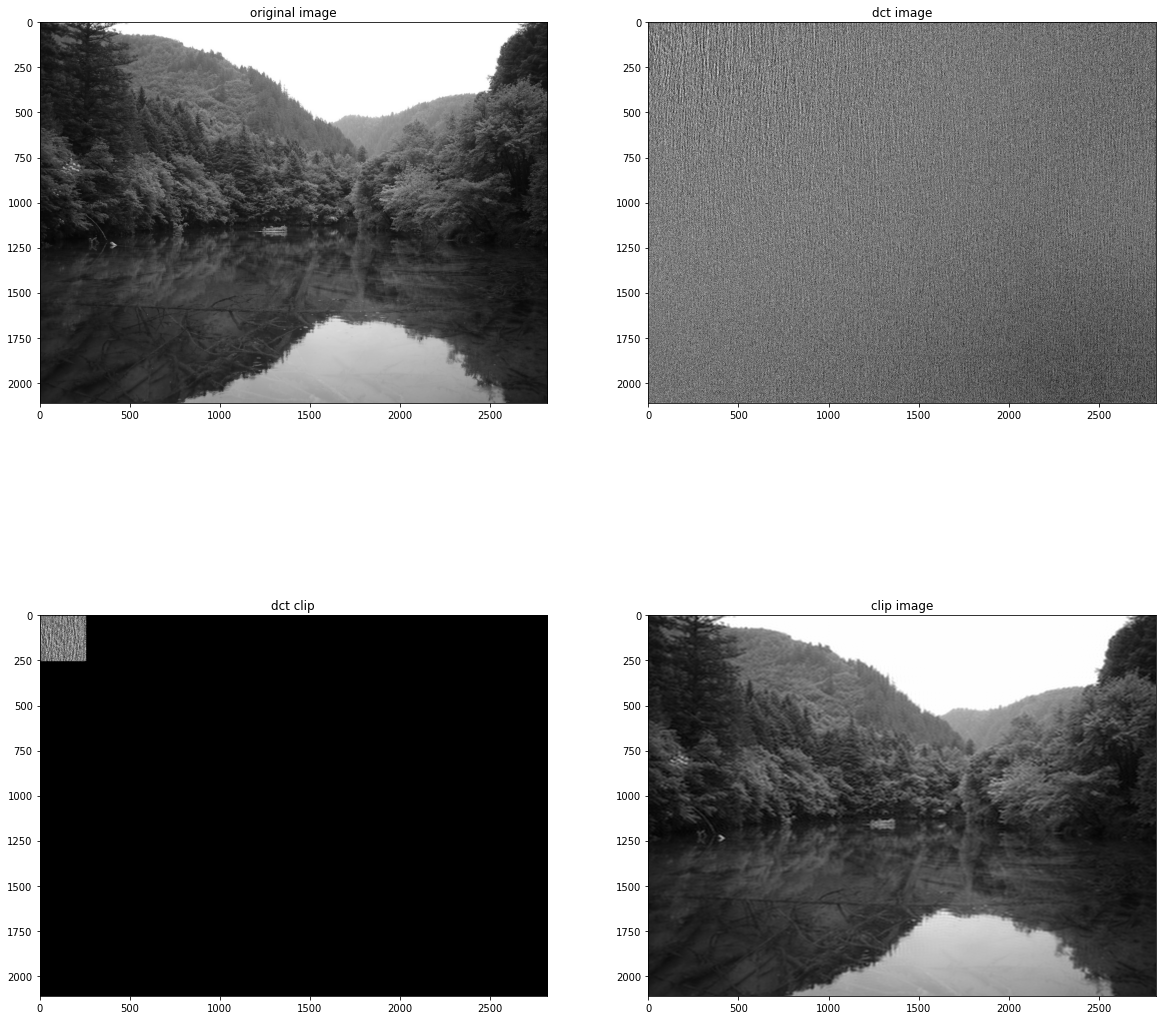

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('env.jfif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_dct = cv2.dct(np.float32(img))
fig, axs = plt.subplots(2,2)
fig.set_size_inches(20, 20, forward=True)
axs[0, 0].set_title('original image')
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('dct image')
axs[0, 1].imshow(cv2.cvtColor(img_dct, cv2.COLOR_BGR2RGB))
img_dct[256:,:] = 0
img_dct[:, 256:] = 0
axs[1, 0].set_title('dct clip')
axs[1, 0].imshow(cv2.cvtColor(img_dct, cv2.COLOR_BGR2RGB))
img_back = cv2.idct(img_dct)
axs[1, 1].set_title('clip image')
axs[1, 1].imshow(cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB)/255.0)
plt.show()

#### 用矩阵做个演示
![mat](mat.png)
经过dct之后
![mat-dct](DCT-mat.png)
量化，将所有dct后的矩阵除8（量化步长）
![quant-mat](quant-mat.png)
z型扫描
![z-scan](z-scan.jpg)
30, 0, -3, -1, -2, -2, -1, -1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
## 熵编码
熵编码即编码过程中按熵原理不丢失任何信息的编码。
1,30,1,0,1,-3,1,-1,2,-2,2,-1,1,1,1,-1,n,0
![huffman-code](huffman.jpg)

## 帧间压缩
运动物体在连续帧中像素信息位置距离相近，其他背景像素基本不变为前提，将前后帧做差获取帧间差值，将差值压缩和运动向量一起进行传输或存储，达到压缩的目的
* Macroblock（宏块）：将图片进行分块（16\*16或4\*4，8\*8等像素）作为后续操作的基本单位
* 运动预测：以当前帧中运动物体的宏块所在位置在参考帧中进行搜索，找到对应最相似的宏块的过程
* 运动向量：当前帧中宏块与参考帧中宏块位置偏移
* 残差宏块：当前帧中宏块与参考帧中最佳匹配的宏块做差值所得残差宏块
* 运动补偿：残差宏块与参考宏块相加获得当前帧中宏块信息
![motion_estimation](original_frames_motion_estimation.png)

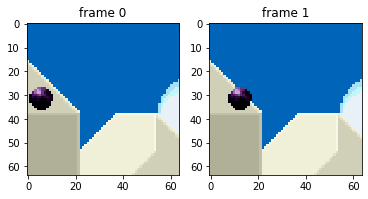

In [10]:
#![ormv](smw_background_ball_1.png)![ormv2](smw_background_ball_2.png)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
frame_0 = mpimg.imread('./smw_background_ball_1.png')
frame_1 = mpimg.imread('./smw_background_ball_2.png')
fig, axis = plt.subplots(1, 2)
axis[0].set_title('frame 0')
axis[0].imshow(frame_0, interpolation='nearest')
axis[1].set_title('frame 1')
axis[1].imshow(frame_1, interpolation='nearest')
plt.show()

#### 残差宏块
对残差宏块的编码大大减小了数据量

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.34509802 -0.5294118  -0.4        -0.41960785  0.
   0.          0.          0.          0.        ]
 [ 0.20784312  0.13333333  0.30196077 -0.4117647  -0.34117648 -0.09411765
   0.          0.          0.          0.        ]
 [ 0.2117647   0.01960784  0.06274509  0.54117644 -0.21568628  0.
   0.          0.          0.          0.        ]
 [-0.25882354  0.4117647   0.34901962  0.47843137  0.6784314  -0.07843138
   0.         -0.05098039  0.          0.        ]
 [-0.05882353  0.5882353   0.6313726   0.78039217  0.7490196   0.70980394
  -0.08627451 -0.01960784  0.          0.        ]
 [ 0.08627451  0.6627451   0.7764706   0.8156863   0.8156863   0.78039217
   0.85490197 -0.10196079  0.          0.        ]
 [ 0.8156863   0.8156863   0.8156863   0.8156863   0.8156863   0.8156863
   0.87058824  0.          0.          0.        ]
 [ 0.8156863   0.8156863 

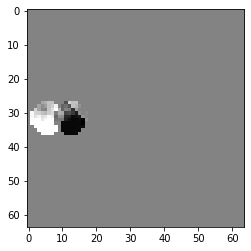

In [27]:
subblock = np.subtract(frame_0[:,:,0], frame_1[:,:,0])
print(subblock[26:36, 10:20])
plt.imshow(subblock, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

#### 运动估计和运动补偿
相较于残差宏块，对宏块以及运动向量的编码，数据量就更小了

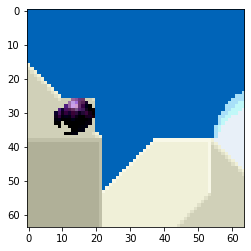

In [28]:
x = 26
y = 10
block_size = 10
ball = frame_0[27:37, 1:11]

plt.imshow(ball, interpolation='nearest')
predicted_frame = np.array(frame_1)
predicted_frame[x:(x+block_size),y:(y+block_size),] = ball
plt.imshow(predicted_frame,interpolation='nearest')
plt.show()

#### IBP帧
* I帧：关键帧，没有参考帧，只能进行帧内压缩
* P帧：差别帧，只向前参考
* B帧：差别帧，向前后参考
* GOP：一组包含IPB帧的集合
![ibporder](ibporder.png)
![iframe](Iframe.png)
![ifd](Iframedata.png)
![pframe](Pframe.png)
![pfd](pframedata.png)
![Bframe](Bframe.png)
![bfd](bframedata.png)

## 帧内预测
对于I帧，可用帧内预测的方式进行压缩。一幅图片相邻像素值相等或相近，则可用当前像素值预测相邻像素值
![inner_frame](smw_bg_block.png)
预测方向与预测值
![prediction](smw_bg_prediction.png)
预测值与原值存在偏差，所以用预测值与原值相减获得残差
![residual](smw_residual.png)

## 编码器工作流程
![mixencode](mixencode.jfif)
#### 分块
![macro_origin](origin.png)
![macro_block](block.png)
#### 预测
包括帧内预测与帧间预测
#### 转换
针对残差块进行DCT变换
#### 量化
丢弃在量化步长内的像素数据（有损压缩的原因）
#### 熵编码
哈夫曼编码
#### 格式化
h264格式流与flv等格式封装